# VW

In [2]:
import pandas as pd
from datetime import timedelta
import pytz
import seaborn as sns
import matplotlib.pyplot as plt
from timezonefinder import TimezoneFinder
import numpy as np
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [22]:
df = pd.read_csv('/Users/oussamanaji/Downloads/dolead_vw_extract_2024_10_30.csv')
df['starttimestamp'] = pd.to_datetime(df['starttimestamp'])
df['endtimestamp'] = pd.to_datetime(df['endtimestamp'])

In [23]:
df_us_horraire = pd.read_csv('us_zip_codes_to_longitude_and_latitude.csv')
df_pop_fr = pd.read_csv('/Users/oussamanaji/Downloads/correspondance-code-insee-code-postal.csv',sep=';')

In [24]:
df_vw = df[df['agent']=='vw'].copy().set_index('discussionid')
df_vw['starttimestamp']+=timedelta(hours=2)
df_vw['endtimestamp']+=timedelta(hours=2)
df_vw['local_hour'] = df_vw['starttimestamp'].dt.hour  
pop_dict = (df_pop_fr.groupby('Code Postal')['Population'].sum()*10**3).to_dict()
df_vw['population'] = df_vw['zip_code'].astype(str).map(pop_dict)
df_vw.tail() 


,agent,starttimestamp,endtimestamp,callto,duration,picked,zip_code,local_hour,population
discussionid,,,,,,,,,
CA3137ddde614fbd5ada07fd0ea619c8ae,vw,2024-10-30 16:22:53.502,2024-10-30 16:23:12.941,33671190656,19.439,True,38190,16,18500.0
CA056a8e52265920a220f819a12d64e020,vw,2024-10-30 16:23:04.238,2024-10-30 16:23:09.118,33684732402,4.880,False,64160,16,16100.0
CAbc24a53b02dfaa692e0378c0f554acc5,vw,2024-10-30 16:27:44.218,2024-10-30 16:27:50.947,33628968662,6.729,False,16000,16,42200.0
CAf6d7cbb6c8324e7123a499a868a72b4b,vw,2024-10-30 16:28:02.408,2024-10-30 16:28:08.149,33634428902,5.741,False,93400,16,46500.0
CA397136f77bff614f898d3176fdfca9de,vw,2024-10-30 16:28:05.423,2024-10-30 16:28:12.088,33665920859,6.665,False,59200,16,92400.0


### Encodage

In [25]:
df_vw=pd.get_dummies(df_vw, columns=['picked'], drop_first=True, dtype=int)
#df_vw_endoded['normalized_duration'] = (df_vw_endoded['duration'] - df_vw_endoded['duration'].min()) / (df_vw_endoded['duration'].max() - df_vw_endoded['duration'].min())
scaler = StandardScaler()
df_vw['normalized_duration'] = scaler.fit_transform(df_vw[['duration']])

df_vw['hour_sin'] = np.sin(2 * np.pi * df_vw['local_hour'] / 24)
df_vw['hour_cos'] = np.cos(2 * np.pi * df_vw['local_hour'] / 24)

df_vw['normalized_population'] = scaler.fit_transform(df_vw[['population']])

In [26]:
df_vw_encoded = df_vw.copy().drop(columns=['agent','starttimestamp','endtimestamp','zip_code','duration','local_hour','population','callto']).dropna()
df_vw_encoded

,picked_True,normalized_duration,hour_sin,hour_cos,normalized_population
discussionid,,,,,
CA849fb3f8b6282dda969ae4895bd15c1b,1,-0.087827,1.224647e-16,-1.0,1.076046
CAcb26137ffc2ad9f7f7f271f35bff8b46,0,-0.491552,1.224647e-16,-1.0,-0.817037
CAb07344b654b9e857453da96f33f5dbc9,0,-0.468367,1.224647e-16,-1.0,0.657647
CAe1d78d03e7c056ef98647c484f2d8df9,0,-0.500242,1.224647e-16,-1.0,-0.279749
CAd9a9a3656549fcdf3ef42c155ce8cd99,1,0.787660,1.224647e-16,-1.0,-0.817037
...,...,...,...,...,...
CA3137ddde614fbd5ada07fd0ea619c8ae,1,-0.287141,-8.660254e-01,-0.5,-0.542677
CA056a8e52265920a220f819a12d64e020,0,-0.506046,-8.660254e-01,-0.5,-0.597549
CAbc24a53b02dfaa692e0378c0f554acc5,0,-0.478245,-8.660254e-01,-0.5,-0.000817


### PCA / T-SNE

In [27]:
features = df_vw_encoded.select_dtypes(include=[np.number])  # Sélectionner uniquement les colonnes numériques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [28]:
pca = PCA(n_components=2)  # On ne garde que les 2 premières composantes

In [29]:

principal_components = pca.fit_transform(scaled_features)

# Créer un DataFrame avec les composantes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2']).reset_index(drop=True)

In [30]:
df_vw_encoded_reset = df_vw_encoded.reset_index(drop=True)
# Ajouter la colonne 'label' à partir de la colonne 'hour_cos' de df_vw_encoded_reset
pca_df['label'] = df_vw_encoded_reset['picked_True']
pca_df.tail()

,PC1,PC2,label
559,-0.006934,0.888421,1
560,0.551792,-0.681911,0
561,0.582648,-0.667226,0
562,0.592951,-0.679182,0
563,0.656613,-0.679244,0


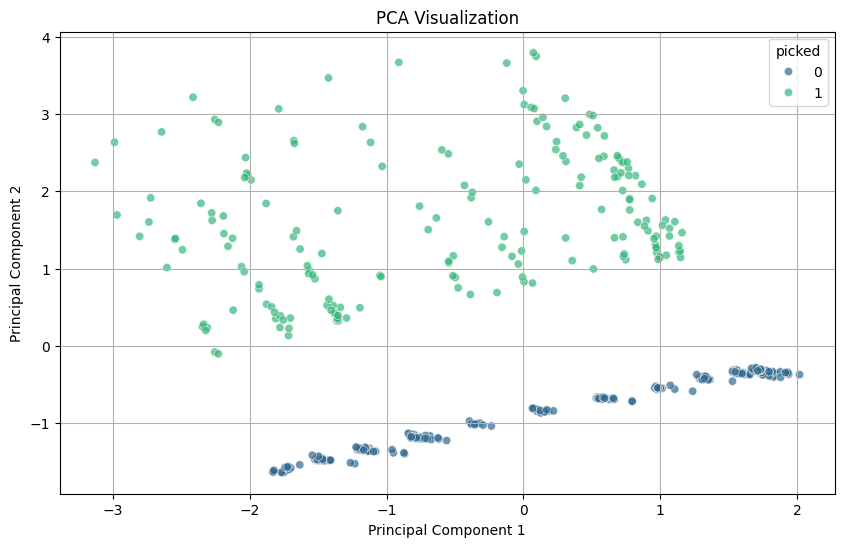

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='viridis', alpha=0.7)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Modifier le titre de la légende
plt.legend(title='picked')

plt.grid()
plt.show()

### Correlation Matrix

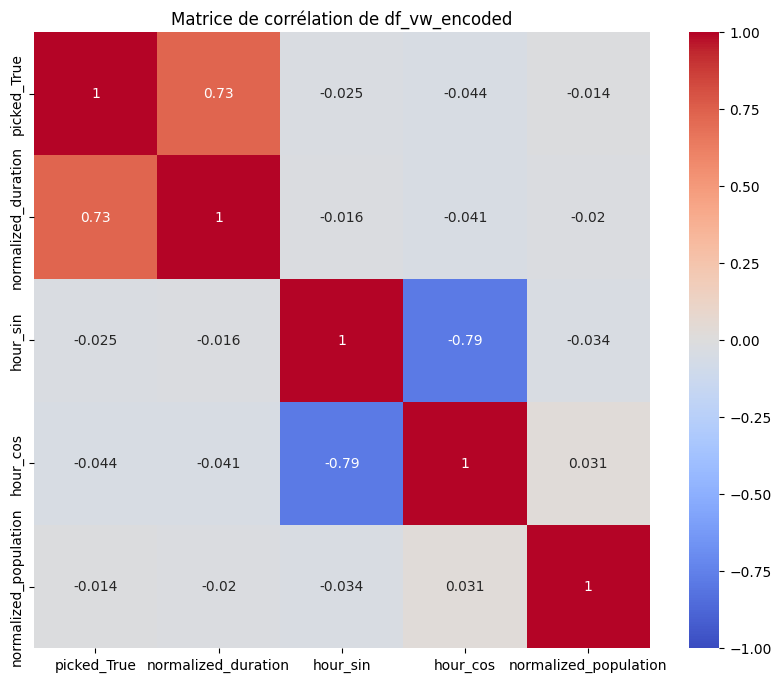

In [32]:
corr_matrix = df_vw_encoded.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Matrice de corrélation de df_vw_encoded')
plt.show()

### % de décrochage en fonction de l'heure

In [88]:
df_vw.head()

,agent,starttimestamp,endtimestamp,callto,duration,zip_code,local_hour,population,picked_True,normalized_duration,hour_sin,hour_cos,normalized_population
discussionid,,,,,,,,,,,,,
CA849fb3f8b6282dda969ae4895bd15c1b,vw,2024-10-22 12:53:04.140,2024-10-22 12:53:36.835,33753183482,32.695,13013,12,89.3,1,-0.087827,1.224647e-16,-1.0,1.076046
CA5b92d291d0bbe3d551cede999529195d,vw,2024-10-22 12:53:12.739,2024-10-22 12:54:43.247,33780235727,90.508,38000,12,NaN,1,0.781435,1.224647e-16,-1.0,NaN
CAcb26137ffc2ad9f7f7f271f35bff8b46,vw,2024-10-22 12:53:20.681,2024-10-22 12:53:26.525,33768545889,5.844,95800,12,6.5,0,-0.491552,1.224647e-16,-1.0,-0.817037
CAb07344b654b9e857453da96f33f5dbc9,vw,2024-10-22 12:53:20.887,2024-10-22 12:53:28.273,33644747042,7.386,73000,12,71.0,0,-0.468367,1.224647e-16,-1.0,0.657647
CAe1d78d03e7c056ef98647c484f2d8df9,vw,2024-10-22 12:53:22.942,2024-10-22 12:53:28.208,33744153872,5.266,69140,12,30.0,0,-0.500242,1.224647e-16,-1.0,-0.279749


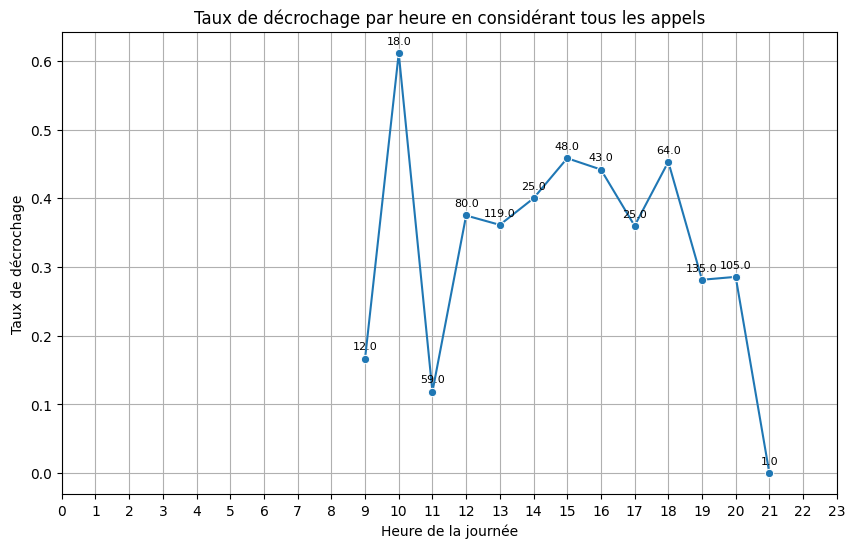

In [33]:
hourly_data = df_vw.groupby('local_hour')['picked_True'].agg(['mean', 'count']).reset_index()
hourly_data.columns = ['local_hour', 'pickup_rate', 'call_count']

# Visualisation
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_data, x='local_hour', y='pickup_rate', marker='o')
plt.title('Taux de décrochage par heure en considérant tous les appels')
plt.xlabel('Heure de la journée')
plt.ylabel('Taux de décrochage')
plt.xticks(range(0, 24))  # Assure l'affichage de toutes les heures de 0 à 23

for i, row in hourly_data.iterrows():
    plt.text(row['local_hour'], row['pickup_rate'] + 0.01,  # Position juste au-dessus du point
             f"{row['call_count']}", ha='center', va='bottom', fontsize=8, color='black')

plt.grid()
plt.show()

In [101]:
hourly_data

,local_hour,pickup_rate,call_count
0,9,0.166667,12
1,10,0.611111,18
2,11,0.118644,59
3,12,0.375000,80
4,13,0.361345,119
5,14,0.400000,25
6,15,0.458333,48
7,16,0.441860,43
8,17,0.360000,25
9,18,0.453125,64


### Clustering pour le sous ensemble des premiers appels

In [34]:
df_vw_encoded_premiers_appels = (df_vw
                   .drop_duplicates(subset=['callto'],keep='first')
                   .copy()
                   .drop(columns=['agent','starttimestamp','endtimestamp','zip_code','duration','local_hour','population','callto'])
                   .dropna())
df_vw_encoded_premiers_appels 

,picked_True,normalized_duration,hour_sin,hour_cos,normalized_population
discussionid,,,,,
CA849fb3f8b6282dda969ae4895bd15c1b,1,-0.087827,1.224647e-16,-1.000000,1.076046
CAcb26137ffc2ad9f7f7f271f35bff8b46,0,-0.491552,1.224647e-16,-1.000000,-0.817037
CAb07344b654b9e857453da96f33f5dbc9,0,-0.468367,1.224647e-16,-1.000000,0.657647
CAe1d78d03e7c056ef98647c484f2d8df9,0,-0.500242,1.224647e-16,-1.000000,-0.279749
CA207cc97c7554fa4509a97fe9e31a46e2,0,-0.512782,-2.588190e-01,-0.965926,0.435873
...,...,...,...,...,...
CA3137ddde614fbd5ada07fd0ea619c8ae,1,-0.287141,-8.660254e-01,-0.500000,-0.542677
CA056a8e52265920a220f819a12d64e020,0,-0.506046,-8.660254e-01,-0.500000,-0.597549
CAbc24a53b02dfaa692e0378c0f554acc5,0,-0.478245,-8.660254e-01,-0.500000,-0.000817


#### PCA ss ens premiers appels

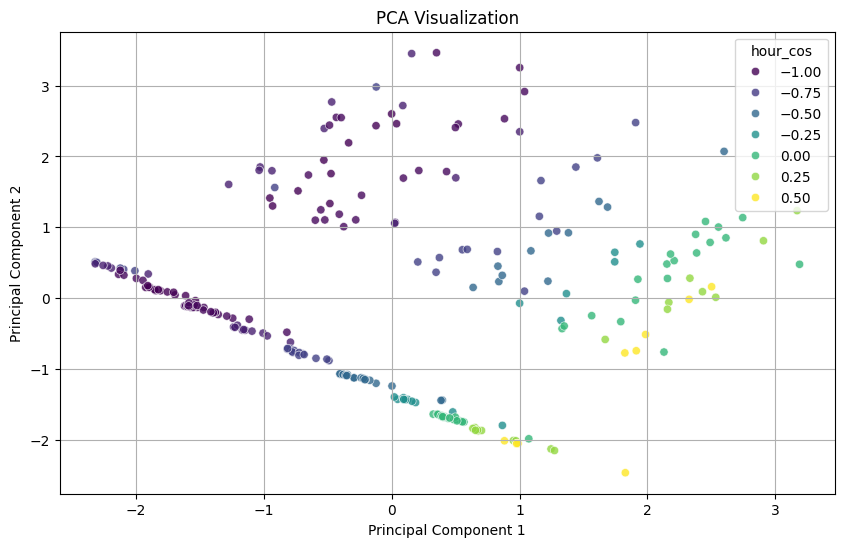

In [35]:
features_2 = df_vw_encoded_premiers_appels.select_dtypes(include=[np.number])  # Sélectionner uniquement les colonnes numériques
scaled_features_2 = scaler.fit_transform(features_2)
principal_components_2 = pca.fit_transform(scaled_features_2)

# Créer un DataFrame avec les composantes principales
pca_df_2 = pd.DataFrame(data=principal_components_2, columns=['PC1', 'PC2']).reset_index(drop=True)

# Ajouter la colonne 'label' à partir de la colonne 'hour_cos' de df_vw_encoded_reset
pca_df_2['label'] = df_vw_encoded_premiers_appels.reset_index(drop=True)['hour_cos']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df_2, x='PC1', y='PC2', hue='label', palette='viridis', alpha=0.8)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Modifier le titre de la légende
plt.legend(title='hour_cos')

plt.grid()
plt.show()

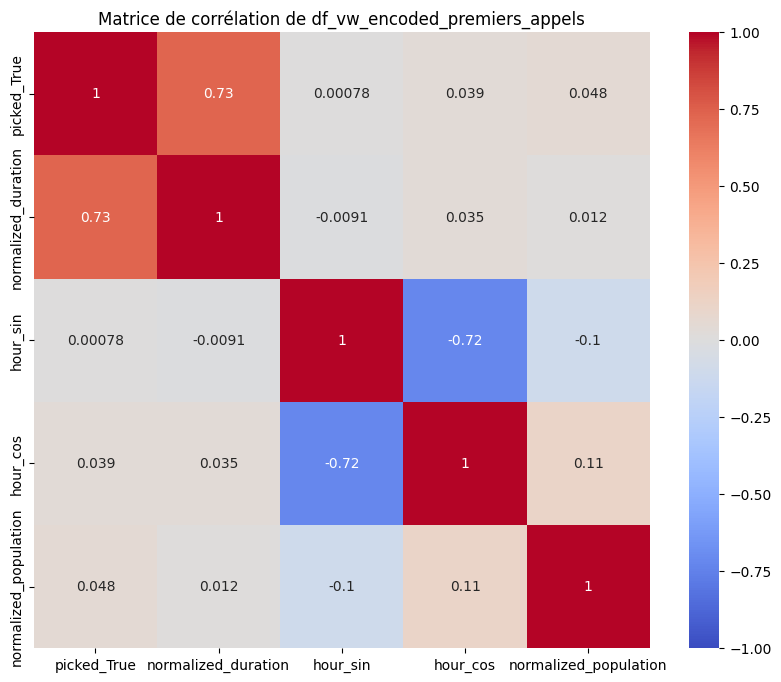

In [36]:
corr_matrix_2 =  df_vw_encoded_premiers_appels.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Matrice de corrélation de df_vw_encoded_premiers_appels')
plt.show()

In [37]:
pca_df_2 = pca_df_2.rename(columns={'label': 'hour_cos'})
pca_df_2['hour_sin'] = df_vw_encoded_premiers_appels.reset_index(drop=True)['hour_sin']
pca_df_2['normalized_duration'] = df_vw_encoded_premiers_appels.reset_index(drop=True)['normalized_duration']
pca_df_2['normalized_population'] = df_vw_encoded_premiers_appels.reset_index(drop=True)['normalized_population']
pca_df_2

,PC1,PC2,hour_cos,hour_sin,normalized_duration,normalized_population
0,-0.483643,1.335701,-1.000000,1.224647e-16,-0.087827,1.076046
1,-1.911359,0.158771,-1.000000,1.224647e-16,-0.491552,-0.817037
2,-1.612352,0.035223,-1.000000,1.224647e-16,-0.468367,0.657647
3,-1.809762,0.104321,-1.000000,1.224647e-16,-0.500242,-0.279749
4,-1.357167,-0.230384,-0.965926,-2.588190e-01,-0.512782,0.435873
...,...,...,...,...,...,...
250,0.636999,0.151408,-0.500000,-8.660254e-01,-0.287141,-0.542677
251,-0.351188,-1.093675,-0.500000,-8.660254e-01,-0.506046,-0.597549
252,-0.222301,-1.133527,-0.500000,-8.660254e-01,-0.478245,-0.000817
253,-0.209395,-1.150794,-0.500000,-8.660254e-01,-0.493100,0.097496


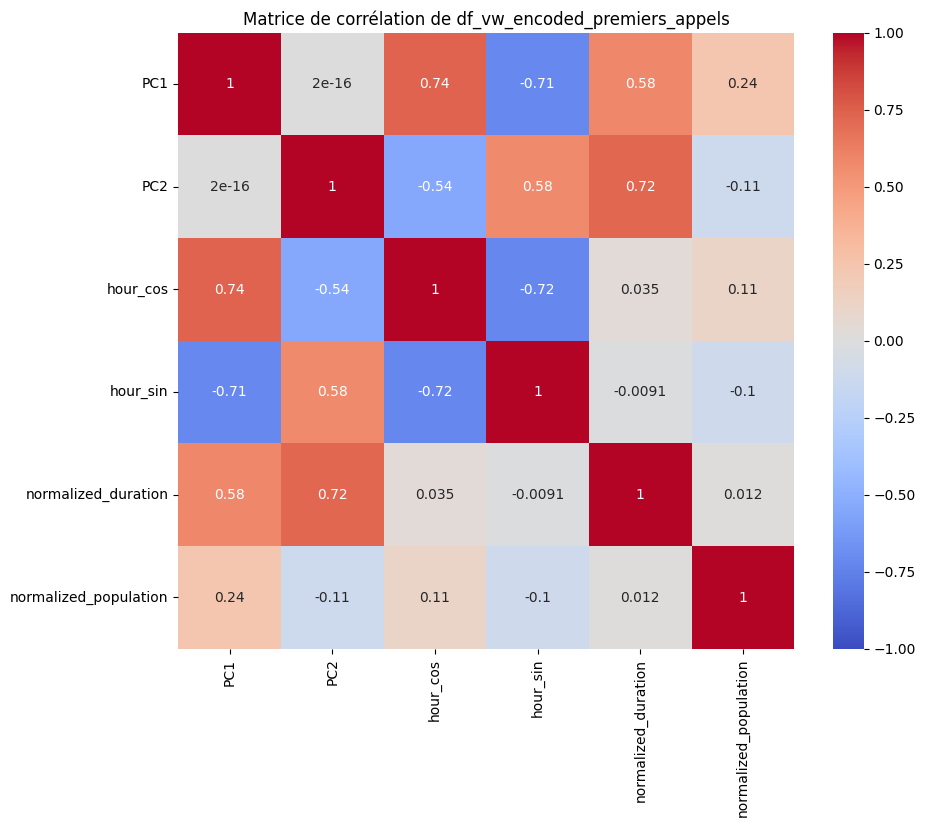

In [38]:
corr_matrix_pca_df_2 =  pca_df_2.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pca_df_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Matrice de corrélation de df_vw_encoded_premiers_appels')
plt.show()